<a href="https://colab.research.google.com/github/cap497/UFMG/blob/main/Teoria_do_Caos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Configurando a aparência dos gráficos
plt.rcParams['figure.figsize']  = (10, 8)
plt.rcParams['axes.labelsize']  = 10
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.facecolor'] = '#FFFFFF'

def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

def trim_axs(axs, N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

In [18]:
def logistic(r, x):
    return r * x * (1 - x)

In [19]:
def solve(r, x0, inicial, final):
    x = np.linspace(inicial, final, final - inicial + 1)
    y = np.zeros(x.size)

    y[0] = x0
    for idx in range(x.size):
        if idx == 0: continue
        y[idx] = logistic(r, y[idx-1])

    return x, y

In [20]:
def plot(r_vec, x0):
    fig, axs = plt.subplots(3, 2)
    fig.subplots_adjust(hspace=.5)
    axs = trim_axs(axs, len(r_vec))

    for ax, r in zip(axs, r_vec):
        ax.set_title(f'r = {r}')
        ax.set_ylim((-0.1, 1.1))
        despine(ax)
        ax.plot(*solve(r, x0, 1, 50))


    plt.show()



# Questão 1

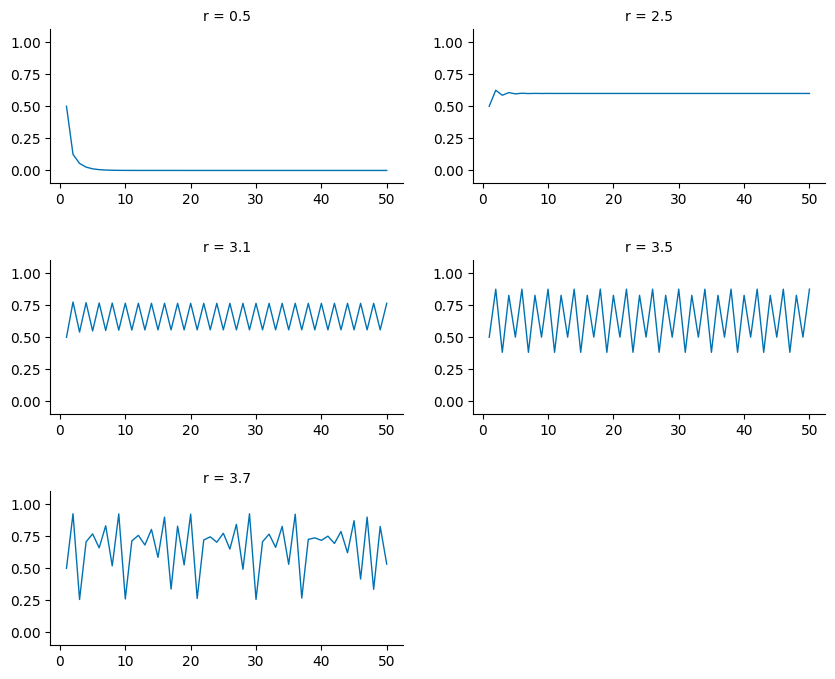

In [21]:
plot([0.5, 2.5, 3.1, 3.5, 3.7], 0.5)

Todas as situações possuem algum padrão.
O primeiro gráfico é uma simples curva de segundo grau que tende à zero.
O segundo começa com uma subida, em seguida oscila, e depois estabiliza em um único valor (0,6).
Os outros três gráficos ficam oscilando em uma série de valores, que se repetem (O último gráfico aparenta repetir o padrão, mas se extendendo na horizontal, e encolhendo na vertical).

Ou seja, em todos os casos, o desenvolvimento da população seguiu algum padrão, ou algo próximo de um padrão.

A regularidade da oscilação da população para os casos de r > 3 provavelmente se dá pelo fator de crescimento ser constante. A população cresce rapidamente e atinge o limite sustentável, caindo vertiginosamente mas se recuperando em seguida. Uma vez que a oscilação retorna a um dado estado inicial, o ciclo se repete.

No primeiro caso o fator de crescimento é insuficiente para manter a população, que cai até a extinção, conforme dito no texto.

# Questão 2

## 0.25

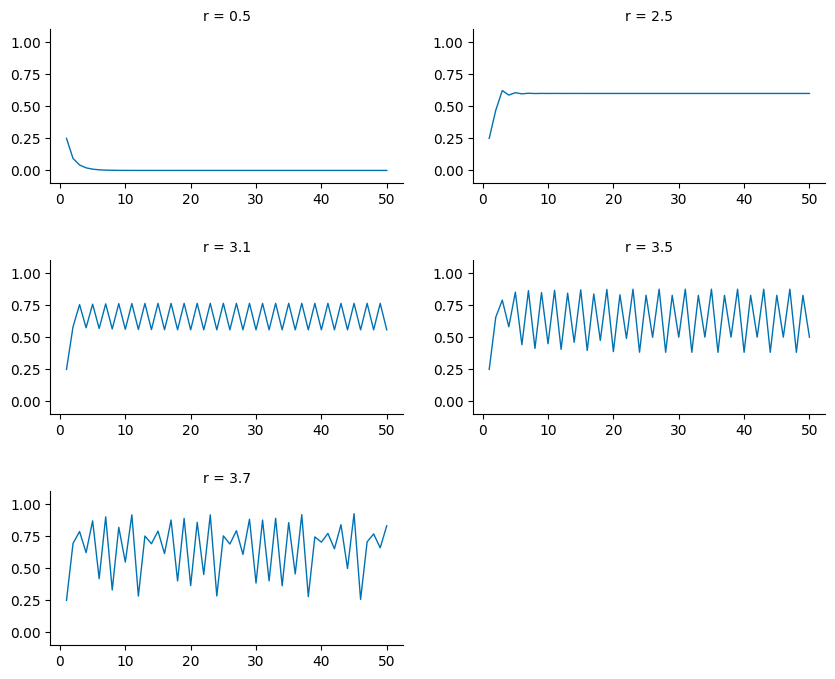

In [22]:
plot([0.5, 2.5, 3.1, 3.5, 3.7], 0.25)

## 0.75

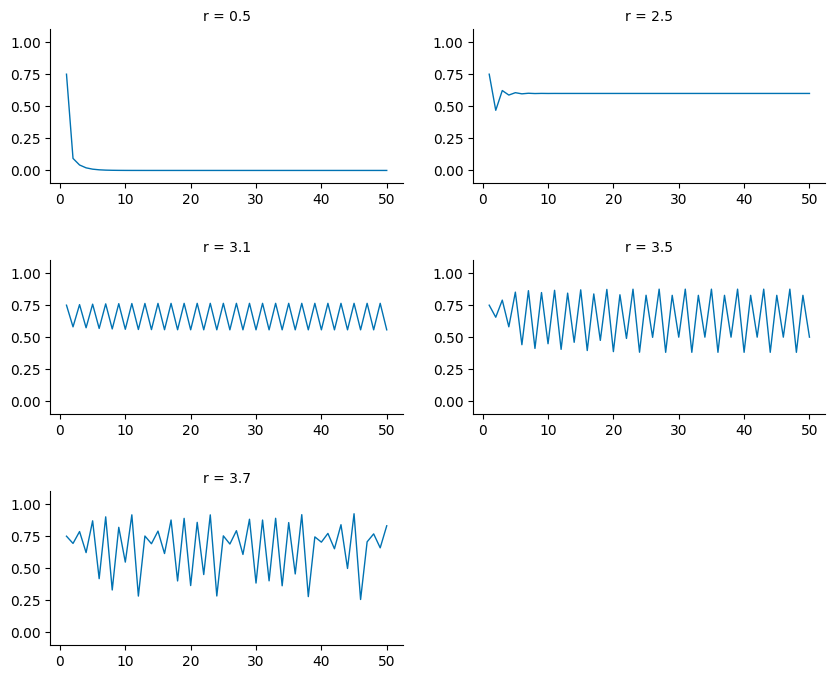

In [23]:
plot([0.5, 2.5, 3.1, 3.5, 3.7], 0.75)

Apesar de termos mudado as condições iniciais das populações de maneira drástica, em todos os casos o padrão foi parecido. Em alguns casos, o ponto inicial foi diferente, mas depois se estabiliza em um padrão parecido com a condição inicial 0.5.

Ou seja, mesmo com condições iniciais diferentes, as populações tendem a se estabilizar em padrões similares, dado um mesmo fator de crescimento.

# Questão 3

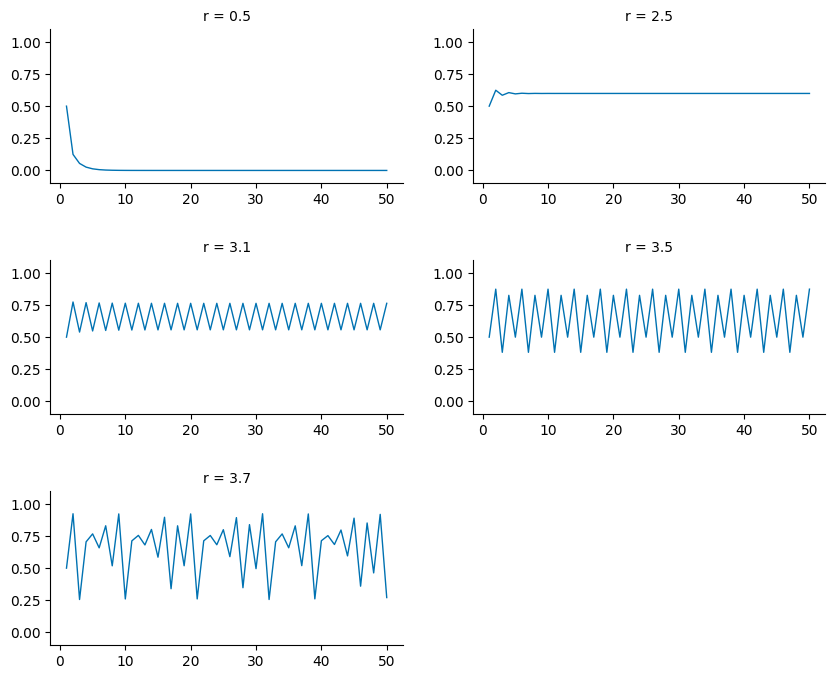

In [24]:
plot([0.5, 2.5, 3.1, 3.5, 3.7], 0.501)

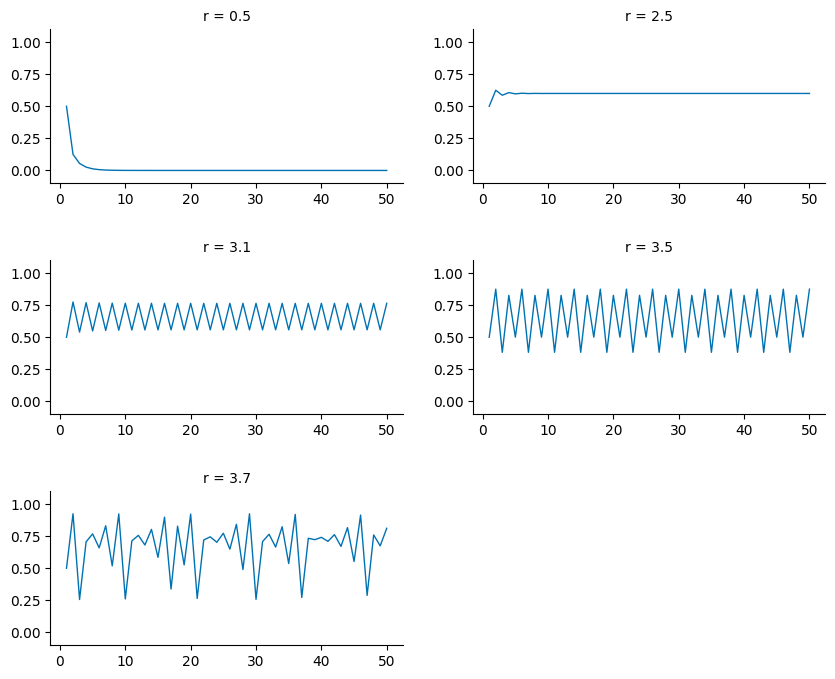

In [25]:
plot([0.5, 2.5, 3.1, 3.5, 3.7], 0.5001)

Não houve nenhuma mudança drástica aparente nos padrões ao utilizar-se condições extremamente similares.

Baseado na Questão 2, esperávamos exatamente este resultado, afinal se para valores muito diferentes houve uma similaridade grande nos padrões, então para pequenas mudanças nas condições iniciais, nós esperávamos mudanças mínimas.

Para confirmar essa observação, vamos sobrepor um dos casos para mostrar a semelhança dos resultados.

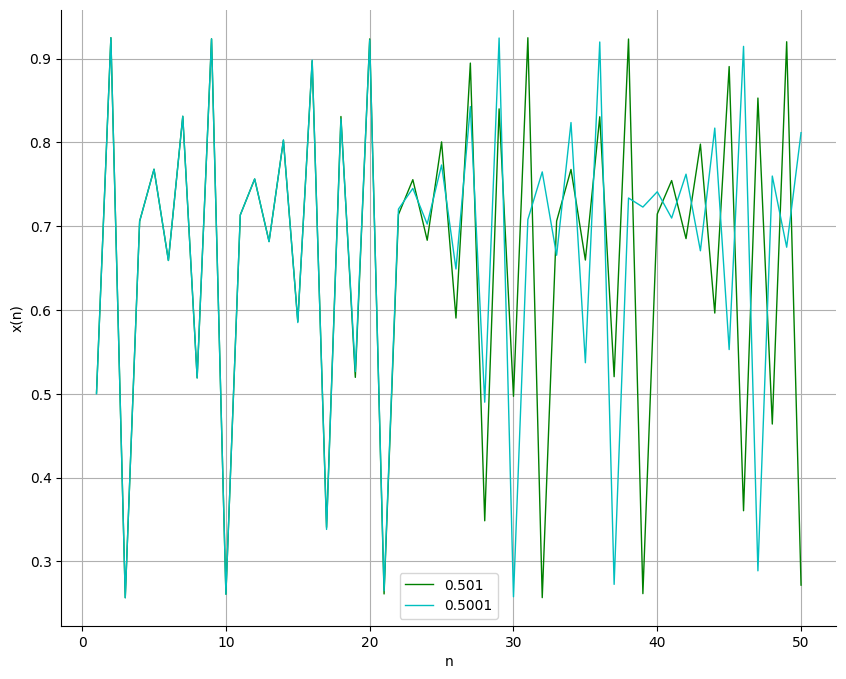

In [26]:
plt.plot(*solve(3.7, 0.501, 1, 50),'g-', label='0.501')
plt.plot(*solve(3.7, 0.5001, 1, 50),'c-', label='0.5001')
plt.xlabel('n')
plt.ylabel('x(n)')
despine(plt.gca())
plt.legend()
plt.grid()

A observação cai por terra. Ao analisarmos o fator com resultados mais caóticos mais de perto, podemos perceber que mesmo mudanças diminutas nas condições iniciais de fato impactam significativamente na evolução da população. Nesse caso, a partir de n=22 o comportamento começa a divergir minimamente mas após n=30 essas diferenças se acumulam e as funções tomam caminhos consideravelmente distintos.

# Questão 4

In [27]:
def scatter(range_start, range_end, floor=-0.1, ceil=1.1):
  range_size=10**4
  last_n = 100

  r_vec = np.linspace(range_start, range_end, range_size)
  y_vec = []

  for r in r_vec:
      _x, y = solve(r, 0.5, 1, 1000)

      y_vec.append(y[-last_n:])

  colorflag = 1
  for x, y in zip(r_vec, y_vec):
    format = 'k,'
    if colorflag:
      format = 'c,'
    colorflag = colorflag ^ 1

    plt.plot([x]*len(y), y, format, alpha=0.2)
    plt.plot([x]*len(y), y, format, alpha=0.2)


  axs = plt.gca()
  despine(axs)
  axs.set_ylim(floor, ceil)


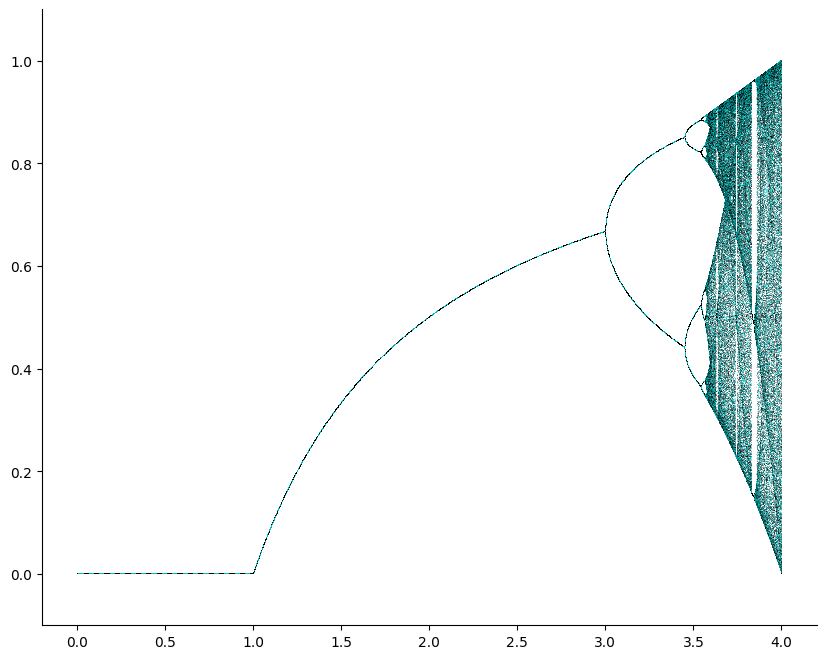

In [28]:
scatter(10**-5, 4)


# Questão 5

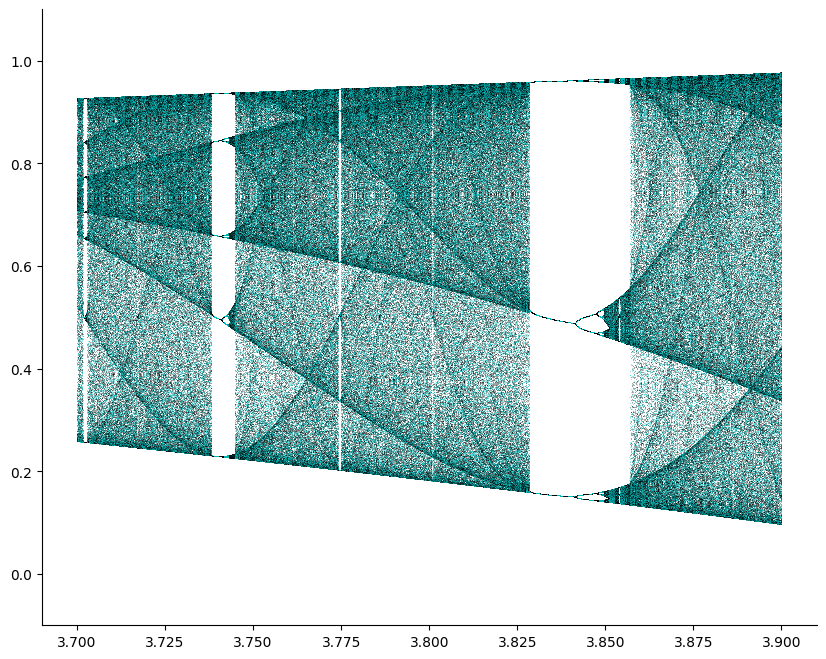

In [29]:
scatter(3.7, 3.9)

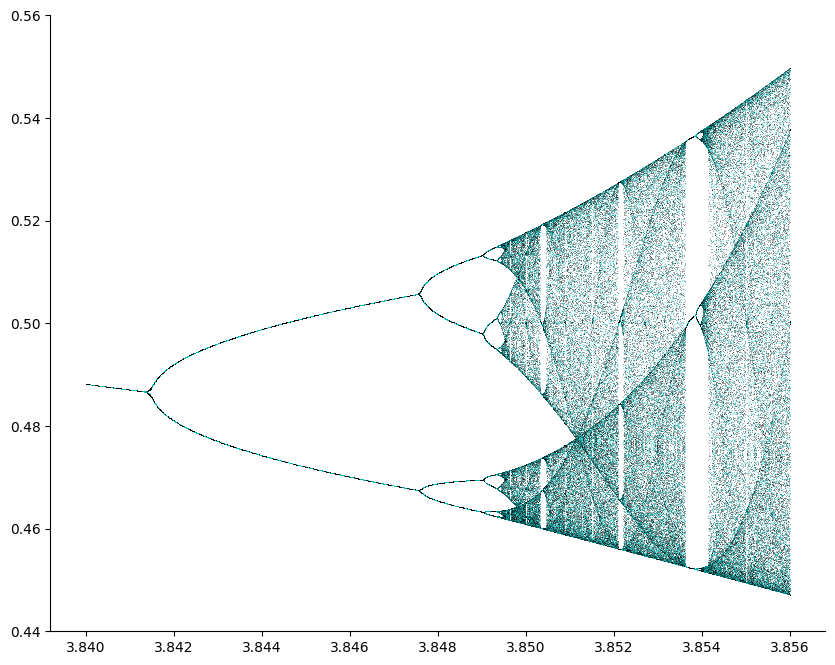

In [30]:
scatter(3.840, 3.856, floor=0.44, ceil=0.56)

# Questão 6

No diagrama da questão 4 é possível verificar uma curva com crescimento aparentemente estável, até que ela se divide no  valor de $r \approx 3$. Uma das ramificações permanece crescente, mas a outra é uma curva decrescente. Cada ramificação volta a se dividir até que um comportamento caótico se desenvolva.

Ainda na questão 4 percebe-se algumas faixas verticais sem a presença de pontos em meio a parte caótica do diagrama. Na questão 5 um zoom de uma dessas faixas revela que elas são áreas de estabilidade causadas pela formação de padrões similares ao da curva para $r < 3$. Esta repetição de padrões continua para escala menores assim como um fractal.